In [ ]:
# mounting on Google Drive,below 2 lines helps in getting the authorization code by loggin into your Google account
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Importing all the required libraries
import os, sys
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
# gathering each of the seperate file paths to create a combined image dataset
OUTPUT_DIR = "/gdrive/Shareddrives/ALDA_Project/data/final_dataset"
IMAGE_SIDE_SIZE = 128

INPUT_DIRS = {
    "elliptical" : "/gdrive/Shareddrives/ALDA_Project/data/data_extract1_shilpa/elliptical",
    "spiral" : "/gdrive/Shareddrives/ALDA_Project/data/data_extract1_shilpa/spiral",
    "irregular" : "/gdrive/Shareddrives/ALDA_Project/data/web_scraping_meghana/irregular_aug",
    "invalid" : "/gdrive/Shareddrives/ALDA_Project/data/web_scraping_meghana/invalid"
}

galaxy_npys = {
    "elliptical" : np.zeros((1, IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3), dtype = np.uint8),
    "spiral" : np.zeros((1, IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3), dtype = np.uint8),
    "irregular" : np.zeros((1, IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3), dtype = np.uint8),
    "invalid" : np.zeros((1, IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3), dtype = np.uint8)
}

In [ ]:
# Getting the number of instances in each class
for galaxy_class in INPUT_DIRS.keys():
  print(galaxy_class, ":\t", len(os.listdir(INPUT_DIRS[galaxy_class])))  

elliptical :	 991
spiral :	 1001
irregular :	 1000
invalid :	 828


In [ ]:
#combining all images of 4 classes into a single output path specified
counter = 0
for galaxy_class in INPUT_DIRS.keys():

  for image_name in os.listdir(INPUT_DIRS[galaxy_class]):
    if "jpg" in image_name:
      temp = cv2.imread(os.path.join(INPUT_DIRS[galaxy_class], image_name))
      temp = cv2.resize(temp, (IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE))

      temp = np.expand_dims(temp, axis = 0)
      galaxy_npys[galaxy_class] = np.concatenate((galaxy_npys[galaxy_class], temp[:]), axis = 0)
      ## create the output structure manually
      cv2.imwrite(os.path.join(OUTPUT_DIR, galaxy_class, image_name), temp)

      counter += 1
      
      if counter % 100 == 0:
        print(counter, "images done!")

print(counter, "images DONE!")

100 images done!
200 images done!
300 images done!
400 images done!
500 images done!
600 images done!
700 images done!
800 images done!
900 images done!
1000 images done!
1100 images done!
1200 images done!
1300 images done!
1400 images done!
1500 images done!
1600 images done!
1700 images done!
1800 images done!
1900 images done!
2000 images done!
2100 images done!
2200 images done!
2300 images done!
2400 images done!
2500 images done!
2600 images done!
2700 images done!
2800 images done!
2900 images done!
3000 images done!
3100 images done!
3200 images done!
3300 images done!
3400 images done!
3500 images done!
3600 images done!
3700 images done!
3800 images done!
3820 images DONE!


In [ ]:
#Displaying the number of images and image dimensions
for galaxy_class in galaxy_npys.keys():
  galaxy_npys[galaxy_class] = galaxy_npys[galaxy_class][1:]
  print(galaxy_npys[galaxy_class].shape)

(991, 128, 128, 3)
(1001, 128, 128, 3)
(1000, 128, 128, 3)
(828, 128, 128, 3)


In [ ]:
# save the data to corresponding .npy file 
for galaxy_class in galaxy_npys.keys():
  temp = np.save(os.path.join(OUTPUT_DIR, galaxy_class+".npy"), galaxy_npys[galaxy_class])

In [ ]:
images = np.zeros(shape = (1, IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3))
# concatenating all images in images array
for galaxy_class in galaxy_npys.keys():
  temp = np.load(os.path.join(OUTPUT_DIR, galaxy_class+".npy"))
  # temp = np.expand_dims(temp, axis = 0)
  images = np.concatenate((images, temp), axis = 0)

images = images[1:]
print(images.shape)

(3820, 128, 128, 3)


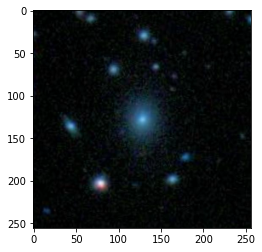

In [ ]:
#Displaying elliptical image below
plt.imshow(galaxy_npys["elliptical"][4])

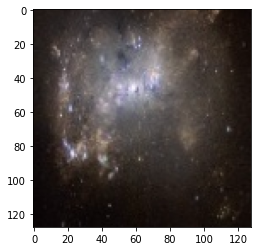

In [ ]:
#Displaying irregular image below
plt.imshow(galaxy_npys["irregular"][1])